# Laboratorio 3

## Integrantes:
#### Paula López Quesada B53957
#### Jhonny Leung Quesada C34259

In [3]:
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests

### Laboratorio 2 - anterior

In [5]:
lifeExpectancydata = pd.read_csv('Life Expectancy Data.csv') #Carga la base de datos y lo guarda en una variable
worldCitiesData = pd.read_csv('worldcitiespop.csv', low_memory=False) #Carga la base de datos y lo guarda en una variable

#### 2. (5%) Para la base de datos de esperanza de vida por país (life-expectancywho), obtenga un subconjunto para conservar únicamente el año más reciente para cada país.

In [7]:
lifeExpectancydata2014 = lifeExpectancydata[(lifeExpectancydata['Year'] == 2014)] #Para el punto 10, ya que los valores de total expenditure del 2015 no estan disponibles
#lifeExpectancydata2014

In [8]:
#Nueva variable que ordena la información filtrada por año y elimina los duplicados por país, manteniendo los valores más recientes
recentlifeExpectancydata = lifeExpectancydata.sort_values('Year', ascending=False).drop_duplicates('Country').sort_index() 

del lifeExpectancydata #Elimina lo que hay en la variable para liberar el espacio en la memoria
#recentlifeExpectancydata #Imprime la nueva base de datos filtrada con valores unicos por país

#### 3. (5%) Investigue a qué corresponden las columnas de ‘hepatitis B’, ‘measles’ (sarampión), ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'thinness 1-19 years', 'Income composition of resources', ‘schooling’ y para cada una explique cuál es el propósito de tenerlas.

Hepatitis B (Hepatitis B (HepB) immunization coverage among 1-year-olds (%))
Se refiere al porcentaje de vacunación contra la Hepatitis B (infección vírica del hígado) entre niños de 1 año, una alta cobertura va a reducir el número de casos y las complicaciones graves de esta enfermedad.

Measles (Measles - number of reported cases per 1000 population)
Se refiere al número de casos reportados de sarampión (enfermedad respiratoria grave que causa un sarpullido y fiebre) por cada 1000 habitantes, una alta incidencia puede afectar la esperanza de vida.

BMI (Average Body Mass Index of entire population)
Se refiere al promedio del índice de masa corporal de los habitantes, si este es saludable, puede reducir el riesgo de enfermedades y problemas de salud relacionados con el peso.

Under-five deaths (Number of under-five deaths per 1000 population)
Se refiere al número de muertes de niños menores de 5 años por cada 1000 habitantes.

Polio (Polio (Pol3) immunization coverage among 1-year-olds (%))
Se refiere al porcentaje de vacunación contra Polio (afecta los nervios y lleva a parálisis total o parcial) entre niños de 1 año, una alta cobertura va a reducir el número de casos y las complicaciones graves de esta enfermedad.

Total expenditure (General government expenditure on health as a percentage of total government expenditure (%))
Se refiere al porcentaje de gasto del gobierno en salud con respecto al gasto total, lo cual está asociado a la calidad y el acceso a los servicios de salud.

Diphtheria (Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%))
Se refiere al porcentaje de vacunación contra la Difteria (afecta las membranas mucosas de la nariz y la garganta) entre niños de 1 año, una alta cobertura va a reducir el número de casos y las complicaciones graves de esta enfermedad.

HIV/AIDS (Deaths per 1 000 live births HIV/AIDS (0-4 years))
Se refiere a la cantidad de muertes por VHI/SIDA (virus que ataca al sistema inmunitario) entre niños de 0 a 4 años.

Thinness 1-19 years (Prevalence of thinness among children and adolescents for Age 10 to 19 (%))
Se refiere al porcentaje de delgadez entre niños y adolescentes de 10 a 19 años, un alto porcentaje indica desnutición y problemas de salud a largo plazo.

Income composition of resources (Human Development Index in terms of income composition of resources (index ranging from 0 to 1))
Se refiere al índice de desarrollo humano en términos de la composición de ingresos de los recursos, un mayor índice indica mejores recursos económicos y sociales.

Schooling (Number of years of Schooling(years))
Se refiere al número de años de escolaridad del país, más años puede indicar mejores prácticas de salud y acceso a servicios.

#### 4. (5%) Elimine los datos con valores nulos en la esperanza de vida: países que no tienen ningún valor para esperanza de vida. En caso de no haber valores nulos para la esperanza de vida, igual incluya el comando que realiza la función de quitar estos valores.

In [22]:
#Nueva variable con un filtro para tener los datos que tengan un valor en Life expectancy
filteredlifeExpectancydata = recentlifeExpectancydata[(recentlifeExpectancydata['Life expectancy '].notna())]
del recentlifeExpectancydata #Elimina lo que hay en la variable para liberar el espacio en la memoria
#filteredlifeExpectancydata #Imprime la nueva base de datos filtrada con no nulos

#### 5. (5%) Para la variable de esperanza de vida, calcule la media, mediana y la desviación estándar de todos los países, para el año más reciente. Imprima estos valores en el notebook.

In [24]:
lifeExp_mean = filteredlifeExpectancydata['Life expectancy '].mean() #Para obtener la media de la esperanza de vida
lifeExp_mean #Imprime la media

71.61693989071038

In [25]:
lifeExp_median = filteredlifeExpectancydata['Life expectancy '].median() #Para obtener la mediana de la esperanza de vida
lifeExp_median #Imprime la mediana

73.9

In [26]:
lifeExp_std = np.std(filteredlifeExpectancydata['Life expectancy ']) #Para obtener la desviación estandar de la esperanza de vida
lifeExp_std #Imprime la desviación estandar

8.101479823784336

#### 6. (10%) Realice un histograma con la variable esperanza de vida para conocer cómo se distribuyen los datos. Cambie progresivamente el número de barras, desde 5 hasta 100. Reporte qué cambia en las distribuciones conforme aumenta la cantidad de barras. Escoja qué número de barras le parece óptimo y explique por qué. Investigue en alguna fuente fiable qué criterios se pueden utilizar y reporte un enlace a esta fuente.

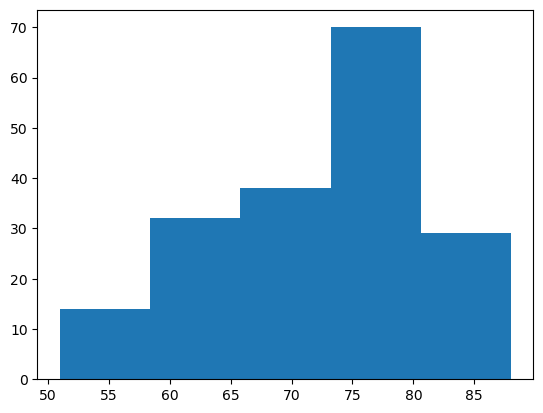

In [28]:
plt.hist(filteredlifeExpectancydata['Life expectancy '], bins=5)
plt.show() 

(array([ 3.,  4.,  1.,  6.,  8.,  5.,  9., 10., 11., 11.,  7.,  9., 30.,
        22., 13.,  5., 17.,  8.,  3.,  1.]),
 array([51.  , 52.85, 54.7 , 56.55, 58.4 , 60.25, 62.1 , 63.95, 65.8 ,
        67.65, 69.5 , 71.35, 73.2 , 75.05, 76.9 , 78.75, 80.6 , 82.45,
        84.3 , 86.15, 88.  ]),
 <BarContainer object of 20 artists>)

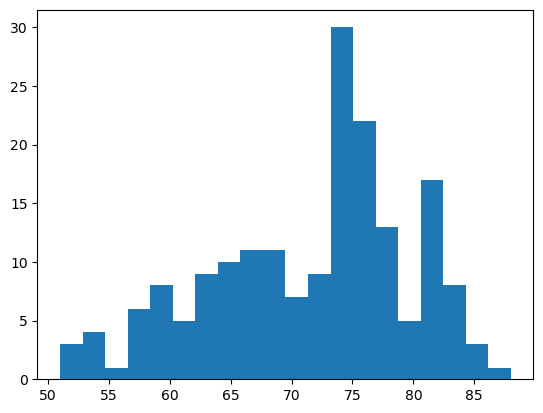

In [29]:
plt.hist(filteredlifeExpectancydata['Life expectancy '], bins=20)
#plt.show() 

(array([ 1.,  1.,  2.,  2.,  1.,  1.,  0.,  0.,  3.,  3.,  3.,  2.,  3.,
         1.,  4.,  2.,  7.,  1.,  5.,  4.,  7.,  3.,  1.,  4.,  7.,  3.,
         0.,  5.,  6.,  2.,  8., 11., 13., 13.,  7.,  7.,  5.,  4.,  2.,
         0.,  6.,  7.,  9.,  2.,  1.,  2.,  0.,  1.,  0.,  1.]),
 array([51.  , 51.74, 52.48, 53.22, 53.96, 54.7 , 55.44, 56.18, 56.92,
        57.66, 58.4 , 59.14, 59.88, 60.62, 61.36, 62.1 , 62.84, 63.58,
        64.32, 65.06, 65.8 , 66.54, 67.28, 68.02, 68.76, 69.5 , 70.24,
        70.98, 71.72, 72.46, 73.2 , 73.94, 74.68, 75.42, 76.16, 76.9 ,
        77.64, 78.38, 79.12, 79.86, 80.6 , 81.34, 82.08, 82.82, 83.56,
        84.3 , 85.04, 85.78, 86.52, 87.26, 88.  ]),
 <BarContainer object of 50 artists>)

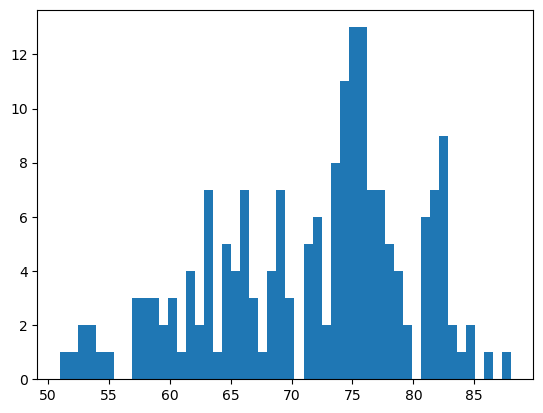

In [30]:
plt.hist(filteredlifeExpectancydata['Life expectancy '], bins=50)
#plt.show() 

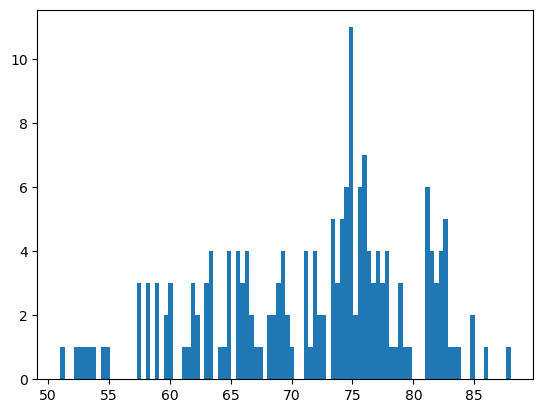

In [31]:
plt.hist(filteredlifeExpectancydata['Life expectancy '], bins=100)
plt.show() 

Cuando el histograma tiene pocas barras o bins es más fácil de entender pero se pierden detalles de la distribución de los datos, al contrario, cuando hay muchas barras como el gráfico con 50 y 100 barras, es muy difícil de entender por la cantidad de detalles en la distribución de los datos.

##### Cálculo optimo de Bins según Sturges y Freedman

In [34]:
#Sturges
sturges_bins = np.log2(len(filteredlifeExpectancydata['Life expectancy '])) + 1
sturges_bins

8.515699838284043

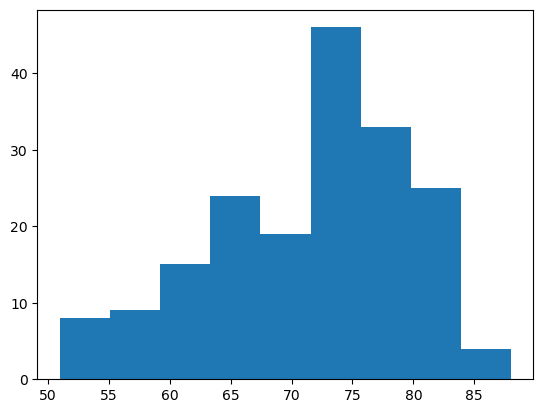

In [35]:
plt.hist(filteredlifeExpectancydata['Life expectancy '], bins=9)
plt.show() 

In [36]:
#Freedman
num_data = len(filteredlifeExpectancydata['Life expectancy '])
irq = np.percentile(filteredlifeExpectancydata['Life expectancy '], 75) - np.percentile(filteredlifeExpectancydata['Life expectancy '], 25)
bin_width = 2 * irq / np.power(num_data, 1/3)
freedman_bins = (np.max(filteredlifeExpectancydata['Life expectancy ']) -  np.min(filteredlifeExpectancydata['Life expectancy '])) / bin_width  + 1

freedman_bins

10.377866996485755

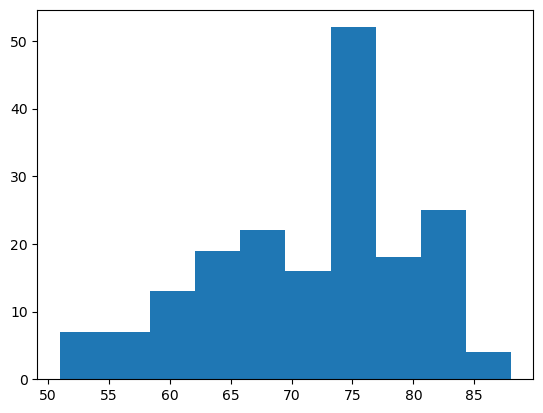

In [37]:
plt.hist(filteredlifeExpectancydata['Life expectancy '], bins=10)
plt.show() 

Al realizar ambos cálculos, el número mayor de Bins resultante es el de Freedman, el cual permite ver con más detalle la distribución de los datos, por lo tanto, se utilizarán 10 bins.

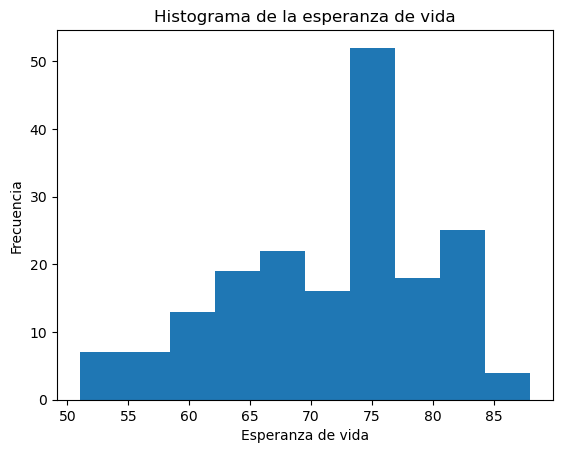

In [39]:
plt.hist(filteredlifeExpectancydata['Life expectancy '], bins=10)
plt.title('Histograma de la esperanza de vida') #Para agregar el título
plt.xlabel('Esperanza de vida') #Para agregar el label del eje x
plt.ylabel('Frecuencia') #Para agregar el label del eje y
plt.show() 

Fuente:

https://medium.com/@maxmarkovvision/optimal-number-of-bins-for-histograms-3d7c48086fde

https://www.analyticslane.com/2022/02/25/calcular-el-numero-optimo-de-bins-para-un-histograma/

#### 7. (10%) En la misma gráfica anterior, coloque líneas verticales en la media (𝜇) y en la posiciones correspondientes a 𝜇 más una desviación estándar (𝜎) y menos una desviación estándar: 𝜇 − 𝜎 y 𝜇 + 𝜎. Comente qué particularidades tiene esta región alrededor de la media.

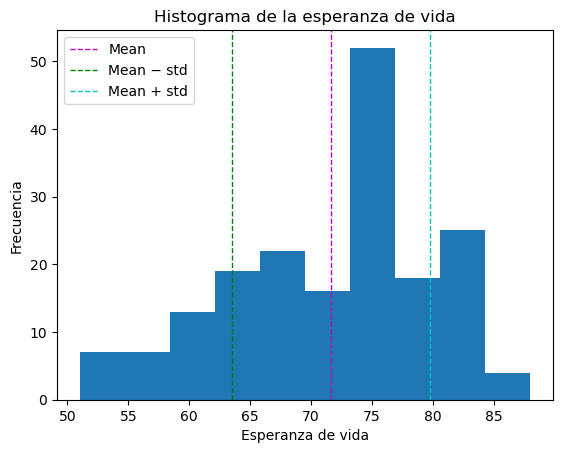

In [44]:
plt.hist(filteredlifeExpectancydata['Life expectancy '], bins=10)
plt.title('Histograma de la esperanza de vida') #Para agregar el título
plt.xlabel('Esperanza de vida') #Para agregar el label del eje x
plt.ylabel('Frecuencia') #Para agregar el label del eje y
plt.axvline(lifeExp_mean, color='m', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(lifeExp_mean - lifeExp_std, color='g', linestyle='dashed', linewidth=1, label='Mean − std')
plt.axvline(lifeExp_mean + lifeExp_std, color='c', linestyle='dashed', linewidth=1, label='Mean + std')
plt.legend()

plt.show() 

La media indica dónde se concentra la mayor parte de los datos, y la desviación estándar indica qué tan dispersos están los datos alrededor de la media.
Las líneas de la media +/ - 1 desviación estándar delimita el rango donde se encuentra el 68% de los datos cuando los datos tienen una distribución normal.

In [46]:
mMean = lifeExp_mean - lifeExp_std
pMean = lifeExp_mean + lifeExp_std
mpMean = [x for x in filteredlifeExpectancydata['Life expectancy '] if mMean <= x <= pMean]
(len(mpMean) / len(filteredlifeExpectancydata['Life expectancy ']))

0.644808743169399

En este caso, el 64.48% de los datos se encuentran dentro del rango de la media +/ - 1 desviación estándar, lo que indica que los datos no siguen una distribución normal perfecta

#### 8. (20%) Investigue cuáles variables tienen la mayor correlación (positiva o negativa) con la esperanza de vida. Explique cuáles son las tres variables más importantes e imprima los valores de la correlación. Explique citando alguna fuente si son correlaciones débiles, moderadas o fuertes.

In [49]:
#Para calcular la correlación entre variables 2015

numericColumns = filteredlifeExpectancydata.select_dtypes(include=['float64']).columns #Para solo utilizar las columnas numericas en el calculo
correlationMatrix = filteredlifeExpectancydata[numericColumns].corr() #Hace una matriz de correlacion entre las columnas
lifeExpCorrelation = correlationMatrix["Life expectancy "] #Para obtener la correlacion de las columnas con respecto a la esperanza de vida
lifeExpCorrelation #Imprime la correlación según los datos

Life expectancy                    1.000000
Adult Mortality                   -0.779119
Alcohol                            0.603775
percentage expenditure             0.043964
Hepatitis B                        0.420848
 BMI                               0.516663
Polio                              0.515602
Total expenditure                 -1.000000
Diphtheria                         0.500300
 HIV/AIDS                         -0.608345
GDP                                0.454491
Population                        -0.048461
 thinness  1-19 years             -0.475020
 thinness 5-9 years               -0.475027
Income composition of resources    0.907364
Schooling                          0.818159
Name: Life expectancy , dtype: float64

Según los calculos anteriores:
Las variables con mayor correlación positiva a la esperanza de vida es Income composition of resources y Schooling, lo cual significa evolucionan en la misma dirección, es decir, si uno sube, el otro también sube y viceversa.
El caso contrario ocurre con Adult Mortality el cual tiene una correlacion negativa, es decir, se mueven en direcciones opuestas, si uno sube, el otro baja y viceversa.

También se realiza el cálculo con los datos del 2014 ya que ciertas columnas como el alcohol están vacias, sin embargo, las columnas con las correlaciones mayores se mantienen.

#### 9. (10%) Utilice diagramas de dispersión para visualizar las relaciones entre estas variables. En total, son 3 diagramas para visualizar las relaciones. Investigue en Google (p.ej., https://en.wikipedia.org/wiki/Scatter_plot).

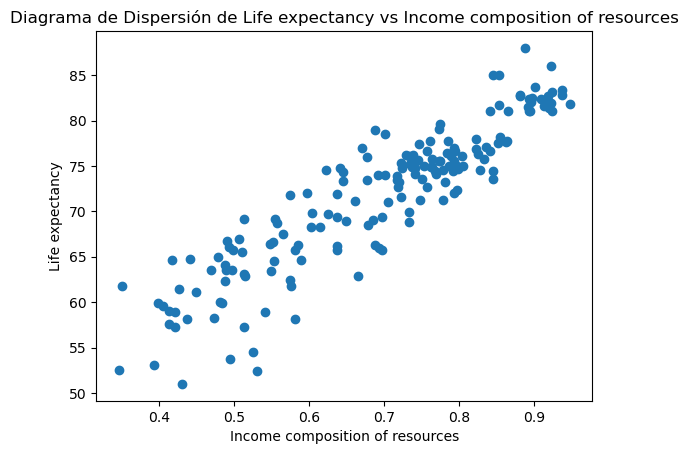

In [52]:
plt.scatter(filteredlifeExpectancydata['Income composition of resources'], filteredlifeExpectancydata['Life expectancy '])
plt.xlabel('Income composition of resources') #Para agregar el label del eje x
plt.ylabel('Life expectancy') #Para agregar el label del eje y
plt.title('Diagrama de Dispersión de Life expectancy vs Income composition of resources') #Para agregar el titulo
plt.show()

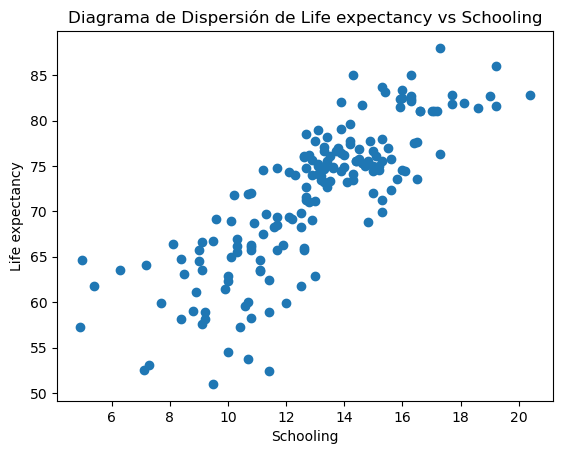

In [53]:
plt.scatter(filteredlifeExpectancydata['Schooling'], filteredlifeExpectancydata['Life expectancy '])
plt.xlabel('Schooling') #Para agregar el label del eje x
plt.ylabel('Life expectancy') #Para agregar el label del eje y
plt.title('Diagrama de Dispersión de Life expectancy vs Schooling') #Para agregar el titulo
plt.show()

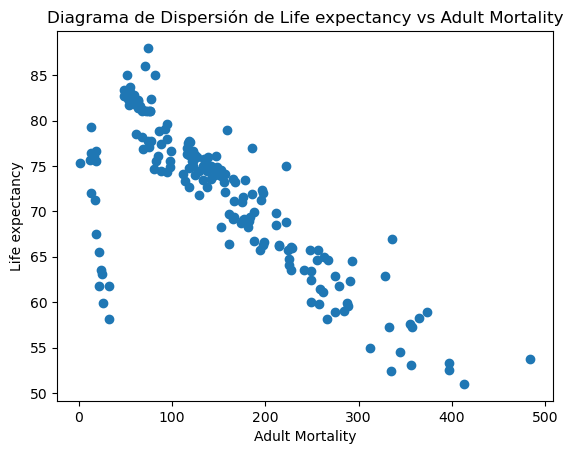

In [54]:
plt.scatter(filteredlifeExpectancydata['Adult Mortality'], filteredlifeExpectancydata['Life expectancy '])
plt.xlabel('Adult Mortality') #Para agregar el label del eje x
plt.ylabel('Life expectancy') #Para agregar el label del eje y
plt.title('Diagrama de Dispersión de Life expectancy vs Adult Mortality') #Para agregar el titulo
plt.show()

#### 10. (10%) Utilice diagramas de cajas para visualizar la distribución de las variables “esperanza de vida”, “total expenditure” y “schooling”. Investigue en Google cómo hacer esto (p.ej., https://en.wikipedia.org/wiki/Box_plot).

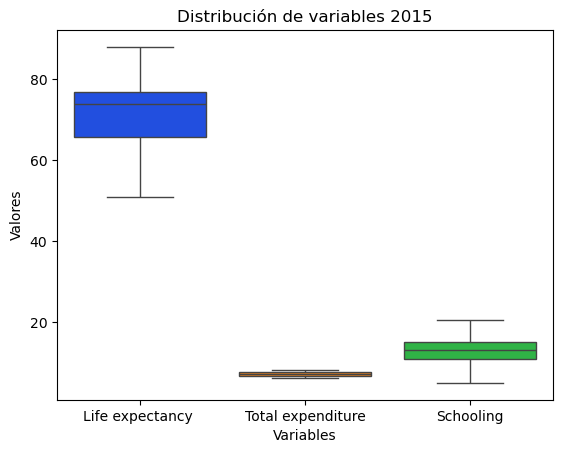

In [56]:
sns.boxplot(data=filteredlifeExpectancydata[['Life expectancy ', 'Total expenditure', 'Schooling']], palette='bright')
plt.title('Distribución de variables 2015') #Para agregar el titulo
plt.xlabel('Variables') #Para agregar el label del eje x
plt.ylabel('Valores') #Para agregar el label del eje y
plt.show()

#### 11. (20%) Usando la base de datos world-cities-database, y algún sitio o servicio web (o biblioteca de Python), cree una función que permita obtener la altitud correspondiente a una ciudad, utilizando la latitud y longitud.

In [58]:
import requests
def getAltitude(latitude, longitude):
    api_url = f"https://api.open-elevation.com/api/v1/lookup?locations={latitude},{longitude}"
    api_response = requests.get(api_url)
    if api_response.status_code == 200:
        api_data = api_response.json()
        return api_data['results'][0]['elevation']
    else:
        return None

#### 12. (10% extra) Para las ciudades con población mayor a 100,000 habitantes, obtenga la altitud correspondiente y agregue todos estos valores en una nueva columna de la base de datos.

In [60]:
worldCitiesPopulation = worldCitiesData[(worldCitiesData['Population'] > 100000)]
#worldCitiesAltitude = worldCitiesPopulation.copy()
#worldCitiesAltitude.loc[:, 'Altitude'] = worldCitiesAltitude.apply(lambda x: getAltitude(x['Latitude'], x['Longitude']), axis=1)
#worldCitiesAltitude

In [61]:
#worldCitiesAltitude.to_csv('worldCitiesAltitude.csv', index=False) #para calcularlo solo 1 vez y luego utilizar la base de datos con la altitud
#del worldCitiesAltitude #Elimina lo que hay en la variable para liberar el espacio en la memoria

## Inicio del Laboratorio 3

In [63]:
from scipy import stats
from scipy.stats import shapiro

In [64]:
worldCities = worldCitiesData.copy() #Carga la base de datos y lo guarda en una variable
countryCodes = pd.read_csv('country code.csv', encoding = "ISO-8859-1", na_values=['', 'NULL', 'N/A'], keep_default_na=False) #Carga la base de datos y lo guarda en una variable

#### 2. a. (5%) Prepare los datos para separar los conjuntos correspondientes a la zona templada y la zona tropical.

In [66]:
def getZone(latitude):
    if (latitude >= -23.26) & (latitude <= 23.26):
        return 'Tropical'
    else:
        return 'Templada'

In [67]:
countryCodes['Alpha-2 code lower'] = countryCodes['Alpha-2 code'].str.lower() #Para convertir el 2 code en minusculas
# Diccionario de mapeo de nombres para hacer match al unir las dos bases de datos
country_mapping = {
    "Tanzania, United Republic of": "United Republic of Tanzania",
    "Timor-Leste": "Timor-Leste",
    "Republic of North Macedonia": "The former Yugoslav republic of Macedonia",
    "Eswatini": "Swaziland",
    "South Sudan": "South Sudan",
    "Moldova (the Republic of)": "Republic of Moldova",
    "S. Korea": "Republic of Korea",
    "Namibia": "Namibia",
    "Iran": "Iran (Islamic Republic of)",
    "Congo (the Democratic Republic of the)": "Democratic Republic of the Congo",
    "N. Korea": "Democratic People's Republic of Korea",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Bolivia": "Bolivia (Plurinational State of)"  
}
countryCodes['Country'] = countryCodes['Country'].replace(country_mapping)

In [68]:
worldCitiesZones = worldCities.copy() #Para copiar la base original

#Para agregar una ciudad de Timor Leste y South Sudan para tener la zona
missing_cities = pd.DataFrame({
    'Country': ['tl', 'ss'],
    'City': ['dili', 'juba'],
    'AccentCity': ['Dili', 'Juba'],
    'Region': ['NaN', 'NaN'],
    'Population': ['NaN', 'NaN'],
    'Latitude': [-8.556856, 4.859363],
    'Longitude': [125.560310, 31.571251]
})

worldCitiesZones = pd.concat([worldCitiesZones, missing_cities], ignore_index=True)

In [69]:
worldCitiesZones = worldCitiesZones.drop_duplicates(subset=['Country']) #Para mantener solo un dato por país
worldCitiesZones.loc[:, 'Zone'] = worldCitiesZones.apply(lambda x: getZone(x['Latitude']), axis=1) #Para agregar la zona por la latitud

del worldCities #Elimina lo que hay en la variable para liberar el espacio en la memoria
#worldCitiesZones

In [70]:
#Para agregar el nombre del país a la base de datos
worldCities = pd.merge(worldCitiesZones, countryCodes[['Country','Alpha-2 code lower']], left_on='Country', right_on='Alpha-2 code lower', how='left')
worldCities.drop(columns=['Alpha-2 code lower'], inplace=True) #elimina la nueva columna repetida
worldCities.rename(columns={'Country_x': 'Country Code', 'Country_y': 'Country Name'}, inplace=True) #cambia el nombre de las columnas country

del worldCitiesZones #Elimina lo que hay en la variable para liberar el espacio en la memoria
#worldCities

In [71]:
lifeExpectancydata = filteredlifeExpectancydata.copy() #Para crear una copia de la base 

#Para agregar la zona a la base de life expentancy según el nombre del país 
lifeExpectancydata = pd.merge(lifeExpectancydata, worldCities[['Country Name','Zone']], left_on='Country', right_on='Country Name', how='left')
lifeExpectancydata.drop(columns=['Country Name'], inplace=True) #Para eliminar la columna repetida
#lifeExpectancydata

In [72]:
# Realizar el merge de los DataFrames para poder tener valores en Total expenditure del 2015, utilizando los valores del 2014
mergedLifeExpectancydata = pd.merge(lifeExpectancydata, lifeExpectancydata2014[['Country', 'Total expenditure']], on='Country', suffixes=('', '_2014'))

mergedLifeExpectancydata.loc[mergedLifeExpectancydata['Total expenditure'].isna(), 'Total expenditure'] = mergedLifeExpectancydata['Total expenditure_2014']
mergedLifeExpectancydata.drop(columns=['Total expenditure_2014'], inplace=True) #elimina la nueva columna
mergedLifeExpectancydata

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Zone
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Templada
1,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,Templada
2,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,7.21,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,Templada
3,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,3.31,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,Tropical
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,5.54,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,Tropical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,5.26,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3,Tropical
179,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,7.70,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6,Tropical
180,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,5.64,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0,Tropical
181,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,4.99,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,Tropical


In [73]:
lifeExpectancyTropical = mergedLifeExpectancydata[(lifeExpectancydata['Zone'] == 'Tropical')]
lifeExpectancyTemplada = mergedLifeExpectancydata[(lifeExpectancydata['Zone'] == 'Templada')]

In [74]:
lifeExpectancyTemplada

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Zone
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Templada
1,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,Templada
2,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,7.21,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,Templada
5,Argentina,2015,Developing,76.3,116.0,8,NaN,0.000000,94.0,0,...,4.79,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3,Templada
6,Armenia,2015,Developing,74.8,118.0,1,NaN,0.000000,94.0,33,...,4.48,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7,Templada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,United Arab Emirates,2015,Developing,77.1,75.0,1,NaN,0.000000,99.0,347,...,3.64,99.0,0.1,3911.746890,NaN,5.3,5.1,0.836,13.3,Templada
172,United Kingdom of Great Britain and Northern I...,2015,Developed,81.2,69.0,3,10.66,0.000000,NaN,91,...,9.12,96.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN,Templada
174,United States of America,2015,Developed,79.3,13.0,23,NaN,0.000000,92.0,188,...,17.14,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN,Templada
175,Uruguay,2015,Developing,77.0,116.0,0,NaN,0.000000,95.0,0,...,8.58,95.0,0.1,15524.842470,3431552.0,1.5,1.4,0.794,15.5,Templada


In [75]:
lifeExpectancyTropical

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Zone
3,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,3.31,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,Tropical
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,5.54,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,Tropical
10,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,95.0,0,...,7.74,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6,Tropical
12,Bangladesh,2015,Developing,71.8,129.0,92,NaN,0.0,97.0,240,...,2.82,97.0,0.1,121.158120,1612886.0,17.9,18.3,0.575,10.2,Tropical
13,Barbados,2015,Developing,75.5,98.0,0,NaN,0.0,97.0,0,...,7.47,97.0,0.1,15557.838100,NaN,3.8,3.7,0.794,15.3,Tropical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,...,5.26,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3,Tropical
179,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,...,7.70,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6,Tropical
180,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,...,5.64,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0,Tropical
181,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,...,4.99,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5,Tropical


#### 2. b. (5%) Utilice diagramas de cajas para estudiar las distribuciones de la esperanza de vida, total expenditure y schooling de los países en las dos zonas planetarias. Debe haber una figura por cada variable y cada una debe tener las 2 cajas correspondientes a las zonas (ver https://www.reneshbedre.com/blog/anova.html para un ejemplo de gráfica).

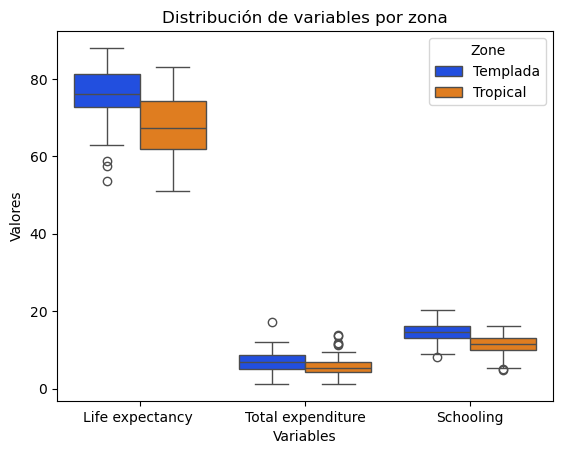

In [77]:
df_melt = mergedLifeExpectancydata.melt(id_vars='Zone', value_vars=['Life expectancy ', 'Total expenditure', 'Schooling'], var_name='variable', value_name='value')

sns.boxplot(x='variable', y='value', hue='Zone', data=df_melt, palette='bright')
plt.title('Distribución de variables por zona')
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.show()

#### 2. c. (10%) Para cada una de las 3 variables y de manera separada para cada subconjunto de datos (tropical vs. templada), realice un test de normalidad como indicado en el tutorial para saber si los datos tienen una distribución gaussiana. En total son 6 tests. Concluya si las distribuciones son normales o no.

In [79]:
variables = ['Life expectancy ', 'Total expenditure', 'Schooling']

# Test de normalidad para cada variable en cada zona
for var in variables:
    print(f"Test de normalidad para {var}:")

    # Zona tropical
    stat, p = stats.shapiro(lifeExpectancyTropical[var].dropna())
    print(f"  Tropical: Estadístico={stat}, p-valor={p}")
    if p > 0.05:
        print("  Los datos parecen seguir una distribución gaussiana (no se rechaza H0)")
    else:
        print("  Los datos no siguen una distribución gaussiana (se rechaza H0)")

    # Zona templada
    stat, p = stats.shapiro(lifeExpectancyTemplada[var].dropna())
    print(f"  Templada: Estadístico={stat}, p-valor={p}")
    if p > 0.05:
        print("  Los datos parecen seguir una distribución gaussiana (no se rechaza H0)\n")
    else:
        print("  Los datos no siguen una distribución gaussiana (se rechaza H0)\n")

Test de normalidad para Life expectancy :
  Tropical: Estadístico=0.9663916854717347, p-valor=0.01607850703211291
  Los datos no siguen una distribución gaussiana (se rechaza H0)
  Templada: Estadístico=0.9419172271436602, p-valor=0.0005935049691404355
  Los datos no siguen una distribución gaussiana (se rechaza H0)

Test de normalidad para Total expenditure:
  Tropical: Estadístico=0.9408667692965592, p-valor=0.0003758477557297116
  Los datos no siguen una distribución gaussiana (se rechaza H0)
  Templada: Estadístico=0.9697602057349306, p-valor=0.03740873453180248
  Los datos no siguen una distribución gaussiana (se rechaza H0)

Test de normalidad para Schooling:
  Tropical: Estadístico=0.9737630691730992, p-valor=0.06531132165137797
  Los datos parecen seguir una distribución gaussiana (no se rechaza H0)
  Templada: Estadístico=0.992071358967067, p-valor=0.8978482630986757
  Los datos parecen seguir una distribución gaussiana (no se rechaza H0)



#### 2. d. (20%) Independientemente del resultado anterior, compare los grupos tropical y templada utilizando t-tests, para cada una de las tres variables estudiadas. Siga el enlace presentado anteriormente para investigar cómo realizar este test en Python.

In [81]:
variables = ['Life expectancy ', 'Total expenditure', 'Schooling']

# T-Tests para cada variable
for var in variables:
    print(f"T-Test para {var}:")

    # Realizar el t-test
    stat, p = stats.ttest_ind(lifeExpectancyTropical[var].dropna(), lifeExpectancyTemplada[var].dropna())
    print(f"  Estadístico={stat}, p-valor={p}")
    if p < 0.05:
        print("  Hay una diferencia significativa entre las zonas (se rechaza H0)\n")
    else:
        print("  No hay una diferencia significativa entre las zonas (no se rechaza H0)\n")


T-Test para Life expectancy :
  Estadístico=-7.990337405036084, p-valor=1.5242935714665636e-13
  Hay una diferencia significativa entre las zonas (se rechaza H0)

T-Test para Total expenditure:
  Estadístico=-2.651490530299549, p-valor=0.008732775296516677
  Hay una diferencia significativa entre las zonas (se rechaza H0)

T-Test para Schooling:
  Estadístico=-8.312646026344778, p-valor=2.798219174601402e-14
  Hay una diferencia significativa entre las zonas (se rechaza H0)



#### 2. e. (10%) Dé una interpretación a estos resultados, con base en lo que investigó previamente en los enlaces proporcionados. Explique cuáles son las hipótesis del t-test y cómo se interpretan los resultados. ¿Hay diferencias en esperanza de vida, gasto total y escolaridad entre zonas del mundo? En caso de ser así, indique cuál de ellos tiene una media mayor.

Las hipotesis del t-test son las siguientes:

1- Hipótesis nula (H₀): No existe una diferencia significativa entre las medias de los dos grupos (las zonas del mundo tienen la misma media en la variable analizada).

2- Hipótesis alternativa (H₁): Existe una diferencia significativa entre las medias de los dos grupos (las zonas del mundo tienen medias diferentes en la variable analizada).

Interpretacion de resultados:

1- T-test para Life expectancy (esperanza de vida):

Estadístico = -7.99

p-valor = 1.52e-13

Interpretación: Dado que el p-valor es menor que el nivel de significancia predeterminado de 0.05, se rechaza la hipótesis nula. Esto indica que hay una diferencia significativa en la "esperanza de vida" entre las zonas del mundo.

T-test para Total expenditure (gasto total):

Estadístico = -2.65

p-valor = 0.0087

Interpretación: Dado que el p-valor es menor que el nivel de significancia predeterminado de 0.05, se rechaza la hipótesis nula. Esto indica que hay una diferencia significativa en el "gasto total" entre las zonas del mundo.

T-test para Schooling (escolaridad):

Estadístico = -8.31

p-valor = 2.79e-14

Interpretación: Dado que el p-valor es menor que el nivel de significancia predeterminado de 0.05, se rechaza la hipótesis nula. Esto indica que hay una diferencia significativa en la "escolaridad" entre las zonas del mundo.

Para finalizar la zona que tiene una media mayor es la templada.
Esto debido al simbolo de "-" en el dato "Estadistico", lo que nos indica que la segunda zona es la que posee una media mayor siendo esta la zona templada.